In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import collections
from scipy import stats

%matplotlib inline

# Examining Product Metadata

In [3]:
PRODUCTS_FILEPATH = 'data/products.csv'

id_to_product = {}

with open(PRODUCTS_FILEPATH, 'r') as f:
    for i, row in enumerate(f):
        if i % 500 == 0:
            print(i)
        for product in json.loads(row):
            id_to_product[product['id']] = product

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500


In [4]:
ids = list(id_to_product.keys())

id_to_category = {}
for product in id_to_product.values():
    for category in product['categories']:
        id_to_category[category['numId']] = category

category_ids_of_interest = set([
    70, # bracelets
    73, # necklaces
    75, # rings
    72, # earrings
])

category_to_count = collections.Counter()
category_to_products = collections.defaultdict(set)

i = 0
for product in id_to_product.values():
    category_ids = set(category['numId'] for category in product['categories'])
    ids_in_common = category_ids & category_ids_of_interest
    if len(ids_in_common) != 1:
        i += 1
    else:
        category_to_count[list(ids_in_common)[0]] += 1
        category_id = list(ids_in_common)[0]
        category_to_products[category_id].add(product['id'])
print(category_to_count)


# for category in id_to_category.values():
#     print(category)
        

Counter({72: 9401, 73: 6937, 70: 4507, 75: 4099})


In [5]:
items = pd.DataFrame.from_dict(id_to_product, orient='index')
items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25100 entries, 7242404 to 810860938
Data columns (total 31 columns):
id                     25100 non-null int64
name                   25100 non-null object
brandedName            25100 non-null object
unbrandedName          25100 non-null object
currency               25100 non-null object
price                  25100 non-null float64
priceLabel             25100 non-null object
inStock                25100 non-null bool
retailer               25100 non-null object
brand                  24704 non-null object
description            25100 non-null object
clickUrl               25100 non-null object
clusterUrl             24704 non-null object
urlIdentifier          25100 non-null object
indexable              25100 non-null bool
image                  25100 non-null object
colors                 25100 non-null object
sizes                  25100 non-null object
categories             25100 non-null object
promotionalDeal        18407 n

In [6]:
def split_category(item):
    for i in item:
        return(i['numId'])
    
items['category_numID'] = items['categories'].apply(split_category)
items.head()

,id,name,brandedName,unbrandedName,currency,price,priceLabel,inStock,retailer,brand,...,rental,cashBack,maxPrice,priceRangeLabel,salePrice,salePriceLabel,maxSalePrice,maxSalePriceLabel,salePriceRangeLabel,category_numID
7242404,7242404,Gurhan Women&s;s Amulet 24K Yellow Gold Dome D...,Gurhan Women&s;s Amulet 24K Yellow Gold Dome D...,Women&s;s Amulet 24K Yellow Gold Dome Drop Ear...,USD,1850.0,"$1,850",True,{'name': 'Saks Fifth Avenue'},{'name': 'Gurhan'},...,False,"{'type': 'Percent', 'hasTiers': False, 'title'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,72
7636349,7636349,Royalty Inspired by Effy Sapphire (1-9/10 ct. ...,Effy Royalty Inspired by Sapphire (1-9/10 ct. ...,Royalty Inspired by Sapphire (1-9/10 ct. t.w.)...,USD,2300.0,"$2,300",True,{'name': 'Macy&s;s'},{'name': 'Effy'},...,False,"{'type': 'Percent', 'hasTiers': False, 'title'...",NaN,NaN,1150.0,"$1,150",NaN,NaN,NaN,73
26292586,26292586,Le Vian Chocolate Diamond (3/4 ct. t.w.) and W...,LeVian Le Vian Chocolate Diamond (3/4 ct. t.w....,Le Vian Chocolate Diamond (3/4 ct. t.w.) and W...,USD,1900.0,"$1,900",True,{'name': 'Macy&s;s'},{'name': 'LeVian'},...,False,"{'type': 'Percent', 'hasTiers': False, 'title'...",NaN,NaN,1140.0,"$1,140",NaN,NaN,NaN,420
26334781,26334781,Royalty Inspired by Effy Emerald (5/8 ct. t.w....,Effy Royalty Inspired by Emerald (5/8 ct. t.w....,Royalty Inspired by Emerald (5/8 ct. t.w.) and...,USD,800.0,$800,True,{'name': 'Macy&s;s'},{'name': 'Effy'},...,False,"{'type': 'Percent', 'hasTiers': False, 'title'...",NaN,NaN,400.0,$400,NaN,NaN,NaN,68
31658464,31658464,Majorica Women&s;s 11mm Round Simulated Pearl ...,Majorica Women&s;s 11mm Round Simulated Pearl ...,Women&s;s 11mm Round Simulated Pearl Stud Earr...,USD,80.0,$80,True,{'name': 'Bloomingdale&s;s'},{'name': 'Majorica'},...,False,"{'type': 'Percent', 'hasTiers': False, 'title'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,72


Minimum Price: 2.0
Maximum Price: 300000.0


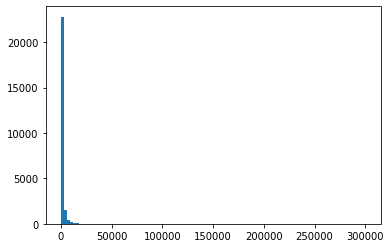

In [7]:
plt.hist(items.price, bins=100); 
print(f'Minimum Price: {min(items.price)}')
print(f'Maximum Price: {max(items.price)}')

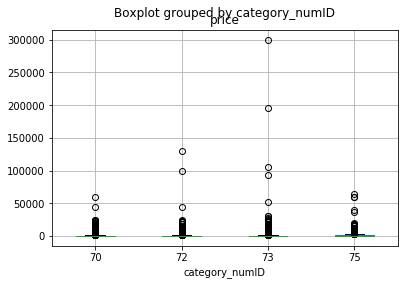

In [8]:
items_of_interest = items[items['category_numID'].isin(category_ids_of_interest)]
items_of_interest.boxplot('price', by='category_numID')

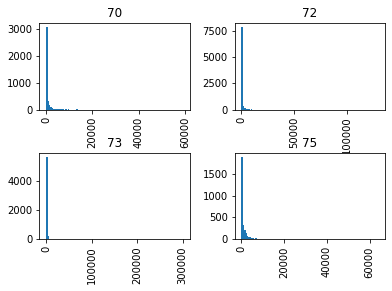

In [9]:
items_of_interest.groupby('category_numID')['price'].agg(['median', 'mean', 'min', 'max'])
items_of_interest['price'].hist(by=items_of_interest['category_numID'], bins = 100); 

In [10]:
F, p = stats.f_oneway(items_of_interest['price'][items_of_interest['category_numID'] == 70], 
             items_of_interest['price'][items_of_interest['category_numID'] == 72],
             items_of_interest['price'][items_of_interest['category_numID'] == 73],
            items_of_interest['price'][items_of_interest['category_numID'] == 75])
print(f'F-stat = {F}; p-val = {p}')

F-stat = 27.838669066685274; p-val = 5.857205066193923e-18
